In [1]:
import pandas as pd

In [2]:
data_folder = 'larc-job-dataset/'

In [3]:
ls larc-job-dataset/

20160101.profile.sg.csv  20160121.profile.sg.csv  hk.profile.csv
20160111.profile.sg.csv  ch.profile.csv


In [4]:
columns = ["uid", "start", "end", "title", "location", "company_name"]
df1 = pd.read_csv(data_folder+'20160101.profile.sg.csv',names=columns)
df2 = pd.read_csv(data_folder+'20160111.profile.sg.csv',names=columns)
df3 = pd.read_csv(data_folder+'20160121.profile.sg.csv',names=columns)

In [5]:
df = df1.append(df2, ignore_index=True).append(df3,ignore_index=True)

In [6]:
df.head()

,uid,start,end,title,location,company_name
0,in_vanessayong,December 2013,NaN,Business Development Manager,Singapore,Instaprint.sg
1,in_vanessayong,March 2015,June 2015,Marketing Assistant,Sydney Australia,CrowdSourceHire
2,in_vanessayong,September 2012,January 2013,Facilitator,Singapore,Cheers Connect International Pte Ltd
3,in_vanessayong,June 2011,November 2011,Regulatory Affairs Associate,Singapore,Biosensors International Group Ltd
4,in_cheeloon-kho-b574786,March 2011,NaN,Senior Mechanical Design Engineer,NaN,Hi-P Electronics Pte Ltd


In [7]:
df['dataset_name']='sg'

In [8]:
df.head()

,uid,start,end,title,location,company_name,dataset_name
0,in_vanessayong,December 2013,NaN,Business Development Manager,Singapore,Instaprint.sg,sg
1,in_vanessayong,March 2015,June 2015,Marketing Assistant,Sydney Australia,CrowdSourceHire,sg
2,in_vanessayong,September 2012,January 2013,Facilitator,Singapore,Cheers Connect International Pte Ltd,sg
3,in_vanessayong,June 2011,November 2011,Regulatory Affairs Associate,Singapore,Biosensors International Group Ltd,sg
4,in_cheeloon-kho-b574786,March 2011,NaN,Senior Mechanical Design Engineer,NaN,Hi-P Electronics Pte Ltd,sg


In [9]:
def parse_ym(x):
    s = x.split(" ")
    if len(s)==0:
        return "",""
    elif len(s)==2:
        return s[0],s[1]
    else:
        return "",x

In [10]:
# set the type as string
df.start = df.start.astype(str)
df.end = df.end.astype(str)
df.title = df.title.astype(str)

In [11]:
df['start_m']=df['start'].apply(lambda x: parse_ym(x)[0])
df['start_y']=df['start'].apply(lambda x: parse_ym(x)[1])
df['end_m']=df['end'].apply(lambda x: parse_ym(x)[0])
df['end_y']=df['end'].apply(lambda x: parse_ym(x)[1])

In [12]:
df.head()

,uid,start,end,title,location,company_name,dataset_name,start_m,start_y,end_m,end_y
0,in_vanessayong,December 2013,nan,Business Development Manager,Singapore,Instaprint.sg,sg,December,2013,,nan
1,in_vanessayong,March 2015,June 2015,Marketing Assistant,Sydney Australia,CrowdSourceHire,sg,March,2015,June,2015
2,in_vanessayong,September 2012,January 2013,Facilitator,Singapore,Cheers Connect International Pte Ltd,sg,September,2012,January,2013
3,in_vanessayong,June 2011,November 2011,Regulatory Affairs Associate,Singapore,Biosensors International Group Ltd,sg,June,2011,November,2011
4,in_cheeloon-kho-b574786,March 2011,nan,Senior Mechanical Design Engineer,NaN,Hi-P Electronics Pte Ltd,sg,March,2011,,nan


In [13]:
# May be used to analyze for where a student went for his first job
students = df[df.title.str.contains('student')]

In [14]:
#drop students position now
df.drop(students.index,inplace=True)

In [122]:
df.describe()

,uid,start,end,title,location,company_name,dataset_name,start_m,start_y,end_m,end_y
count,301050,301050,301050,301050,64406,297523,301050,301050,301050,301050,301050
unique,116006,1061,915,125898,1597,135888,1,101,214,107,193
top,in_tiffanyrileighng,nan,nan,Director,Singapore,Standard Chartered Bank,sg,,nan,,nan
freq,42,44784,116683,3180,40873,1736,301050,77660,44784,142620,116683


In [16]:
titles = df.title.value_counts()
delta = 100

transfer_dict = dict()
for i in range(len(titles)):
    if int(titles.values[i])>=delta:
        transfer_dict[titles.index[i]]=dict()
    else:
        break

In [121]:
print(transfer_dict.keys())

dict_keys(['Director', 'Intern', 'Manager', 'Project Manager', 'Software Engineer', 'Consultant', 'Owner', 'Managing Director', 'Engineer', 'Associate', 'Sales Manager', 'Business Development Manager', 'Project Engineer', 'Assistant Manager', 'Account Manager', 'General Manager', 'Teacher', 'Senior Consultant', 'Senior Software Engineer', 'Research Assistant', 'Marketing Executive', 'Sales Executive', 'Analyst', 'Vice President', 'Senior Manager', 'Student', 'Accountant', 'Business Analyst', 'Senior Engineer', 'CEO', 'Operations Manager', 'Marketing Manager', 'Executive', 'Internship', 'Account Executive', 'Administrative Assistant', 'Senior Associate', 'Founder', 'Lecturer', 'Associate Director', 'Finance Manager', 'Partner', 'manager', 'Executive Director', 'HR Executive', 'Graphic Designer', 'Assistant Vice President', 'Sales Engineer', 'Summer Intern', 'System Engineer', 'Product Manager', 'Sales', 'Secretary', 'Supervisor', 'System Analyst', 'Designer', 'Process Engineer', 'Custom

In [18]:
uid_list = df.uid.unique()

In [19]:
print(uid_list[0])

print(df[df.uid==uid_list[0]][["uid","start","end","title"]])

in_vanessayong
              uid           start            end                         title
0  in_vanessayong   December 2013            nan  Business Development Manager
1  in_vanessayong      March 2015      June 2015           Marketing Assistant
2  in_vanessayong  September 2012   January 2013                   Facilitator
3  in_vanessayong       June 2011  November 2011  Regulatory Affairs Associate


In [20]:
# transfer[x][y]=c --> there are c records showing that people transfer from position x to position y
selected_titles = transfer_dict.keys()

for x in selected_titles:
    for y in selected_titles:
        if not y in transfer_dict[x]:
            transfer_dict[x][y]=0

In [21]:
# for each person, see how they transfer from one job to the other
import time

count = 0
tt = 0
for uid in uid_list:
    count+=1
    if count%10000==0:
        print("processed:",count, time.time()-tt)
        tt=time.time()
        
    target_df = df[df.uid==uid]
    if len(target_df)>=2:
        for i in range(len(target_df)-1):
            next_pos = target_df.iloc[i].title
            prev_pos = target_df.iloc[i+1].title
            if prev_pos in transfer_dict:
                if next_pos in transfer_dict:
                    transfer_dict[prev_pos][next_pos]+=1

processed: 10000 1508294489.8916605
processed: 20000 160.3724250793457
processed: 30000 160.16466808319092
processed: 40000 160.15171837806702
processed: 50000 160.07933259010315
processed: 60000 159.89301872253418
processed: 70000 159.49970841407776
processed: 80000 160.2201108932495


KeyboardInterrupt: 

In [ ]:
# x-->y : x <= y (in general case)
# x-->y-->z : x <= y <= z (z "may" be "senior" than x and y, but could be equal to x and y)
# if we can find frequent x-->y and y-->x ==> x = y ---> can find a group of titles are "position-wise" equal
# C1 --> C2 ---> C3
# C4 --> C5 -----^

In [24]:
import pickle
#pickle.dump(transfer_dict, open("transfer_dict.pkl","wb"))

In [25]:
transfer_dict = pickle.load(open("transfer_dict.pkl",'rb'))

In [27]:
transfer_dict

{'-': {'-': 16,
  'AVP': 0,
  'Account Assistant': 0,
  'Account Director': 0,
  'Account Executive': 0,
  'Account Manager': 0,
  'Accountant': 0,
  'Accounts Assistant': 0,
  'Accounts Executive': 0,
  'Admin': 0,
  'Admin Assistant': 0,
  'Admin Executive': 0,
  'Administrative Assistant': 0,
  'Administrative Executive': 0,
  'Administrator': 0,
  'Analyst': 0,
  'Analyst Programmer': 0,
  'Application Consultant': 0,
  'Application Engineer': 0,
  'Architect': 0,
  'Art Director': 0,
  'Assistant Accountant': 0,
  'Assistant Director': 0,
  'Assistant Engineer': 0,
  'Assistant Manager': 0,
  'Assistant Marketing Manager': 0,
  'Assistant Professor': 0,
  'Assistant Project Manager': 0,
  'Assistant Sales Manager': 0,
  'Assistant Vice President': 0,
  'Associate': 1,
  'Associate Consultant': 0,
  'Associate Director': 0,
  'Associate Engineer': 0,
  'Associate Manager': 0,
  'Audit Assistant': 0,
  'Audit Associate': 0,
  'Audit Intern': 0,
  'Audit Manager': 0,
  'Audit Senior'

In [68]:
import networkx as nx
G=nx.DiGraph() 

In [77]:
import networkx as nx
G=nx.DiGraph() 

epsilon = 10

for prev_pos in transfer_dict:
    for next_pos in transfer_dict[prev_pos]:
        weight = transfer_dict[prev_pos][next_pos]
        if weight>=epsilon and prev_pos!=next_pos:
            print(prev_pos,"-->",next_pos,":",weight)
            G.add_edge(prev_pos,next_pos,weight=weight)

Director --> Owner : 25
Director --> Managing Director : 49
Director --> Vice President : 11
Director --> CEO : 15
Director --> Partner : 19
Director --> Executive Director : 20
Intern --> Software Engineer : 27
Intern --> Consultant : 10
Intern --> Engineer : 20
Intern --> Associate : 25
Intern --> Assistant Manager : 10
Intern --> Research Assistant : 43
Intern --> Marketing Executive : 13
Intern --> Analyst : 17
Intern --> Student : 26
Intern --> Account Executive : 21
Intern --> Administrative Assistant : 11
Intern --> Summer Intern : 15
Intern --> Management Trainee : 12
Intern --> Teaching Assistant : 14
Manager --> Director : 28
Manager --> Project Manager : 10
Manager --> Senior Manager : 52
Manager --> Associate Director : 16
Manager --> Assistant Vice President : 11
Manager --> AVP : 10
Project Manager --> Manager : 14
Project Manager --> Account Manager : 11
Project Manager --> General Manager : 10
Project Manager --> Senior Consultant : 11
Project Manager --> Operations Man

In [123]:
i = 1
for x in nx.simple_cycles(G):
    print(i,":",x)
    i+=1
    


1 : ['Administrative Assistant', 'Intern']
2 : ['Teaching Assistant', 'Research Assistant']
3 : ['Teaching Assistant', 'Research Assistant', 'Intern']
4 : ['Intern', 'Summer Intern']
5 : ['Intern', 'Student']
6 : ['Intern', 'Research Assistant']
7 : ['Project Engineer', 'Site Engineer']
8 : ['Project Engineer', 'Engineer']
9 : ['Analyst Programmer', 'Software Engineer']
10 : ['Senior Software Engineer', 'Software Engineer', 'Software Developer']
11 : ['Senior Software Engineer', 'Software Engineer']
12 : ['Software Developer', 'Software Engineer']
13 : ['Analyst', 'Associate']
14 : ['Analyst', 'Consultant', 'Senior Consultant', 'Assistant Manager', 'Associate']
15 : ['Analyst', 'Consultant', 'Associate']
16 : ['Analyst', 'Consultant', 'Project Manager', 'Senior Consultant', 'Assistant Manager', 'Associate']
17 : ['Analyst', 'Consultant', 'Manager', 'Project Manager', 'Senior Consultant', 'Assistant Manager', 'Associate']
18 : ['Analyst', 'Manager', 'Project Manager', 'Senior Consultant

In [124]:
i=1
for x in nx.strongly_connected_components(G):
    if len(x)>1:
        print(i,":",x)
        i+=1

1 : {'Partner', 'Director', 'Managing Director', 'Executive Director', 'Owner', 'General Manager', 'Vice President'}
2 : {'Account Manager', 'Sales Manager', 'Business Development Manager'}
3 : {'Analyst', 'Senior Associate', 'Assistant Manager', 'Senior Project Manager', 'Senior Consultant', 'Manager', 'Consultant', 'Associate', 'Project Manager'}
4 : {'Analyst Programmer', 'Software Developer', 'Senior Software Engineer', 'Software Engineer'}
5 : {'Project Engineer', 'Site Engineer', 'Engineer'}
6 : {'Administrative Assistant', 'Student', 'Teaching Assistant', 'Summer Intern', 'Intern', 'Research Assistant'}


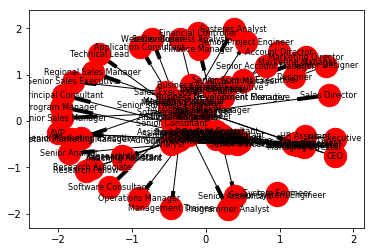

In [117]:
import matplotlib.pyplot as plt
import pylab
pos = nx.spring_layout(G,scale=2)
nx.draw_networkx_nodes(G,pos,cmap=plt.get_cmap('jet'),node_size = 500)
nx.draw_networkx_labels(G, pos,font_size=8)
nx.draw_networkx_edges(G, pos)
plt.show()
